# Spaceship Preprocessing
Cleaning, data integration, reduction, and transformation for Spaceship Titanic dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset 

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

test_df = pd.read_csv("test.csv")

- <b>PassengerId</b>: gggg_pp format, where gggg is a group and pp is the passenger number in the group.
- <b>HomePlanet</b>: their permanent residency planet.
- <b>CryoSleep</b>: whether or not they're being put to cryosleep during the voyage.
- <b>Cabin</b>: deck/num/side, with side can either be P (port) and S (starboard)
- <b>Destination</b>: their disembarking planet.
- <b>Age</b>: their age duh.
- <b>VIP</b>: whether or not they belong to the VIPs.
- <b>RoomService</b>: amount of money spent in room services.
- <b>FoodCourt</b>: amount of money spent in the food court.
- <b>ShoppingMall</b>: amount of money spent in the shopping mall.
- <b>Spa</b>: amount of money spent in spas.
- <b>VRDeck</b>: amount of money spent in VR decks.
- <b>Name</b>: name.
- <b>Transported</b>: yes/no, the 'target' column for prediction. 

In [3]:
# Looking for missing values or NaN
print("Train set missing values: ")
print(train_df.isna().sum())

Train set missing values: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [4]:
# Looking for duplicate entries
print(train_df.duplicated().sum())

0


In [5]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

# Exploratory Data Analysis
1. Percentage of transported pax. 
2. Histogram of continuous features differentiated by Transported: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
3. Histogram of categorical features differentiated by Transported: HomePlanet, CryoSleep, Destination, VIP

Text(0.5, 1.0, 'Spaceship Titanic Pax Transported')

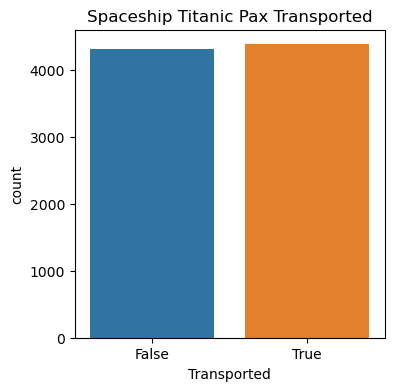

In [7]:
plt.figure(figsize=(4, 4))
sns.countplot(data=train_df, x="Transported")
plt.title("Spaceship Titanic Pax Transported")

Insight gained: 
- The passengers are proportionally split between transorted or not.

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Spaceship Titanic Pax Age Distribution')

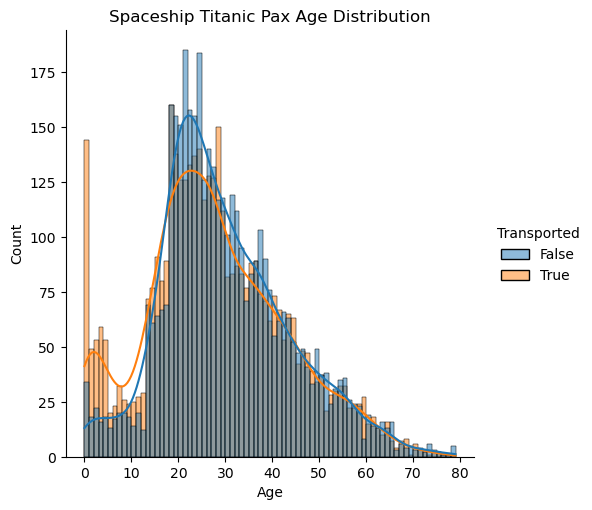

In [8]:
sns.displot(data=train_df, x="Age", hue="Transported", kde=True, binwidth=1)
plt.title("Spaceship Titanic Pax Age Distribution")

Insight:
- A person of age 0-18 is most likely to be transported.
- A person of age 18-25 is less likely to be transported.
- A person of age older than 25 is equally likely to be transported than not.

To-do:
- Create a categorical values that separate between age groups: child, teen, adult.

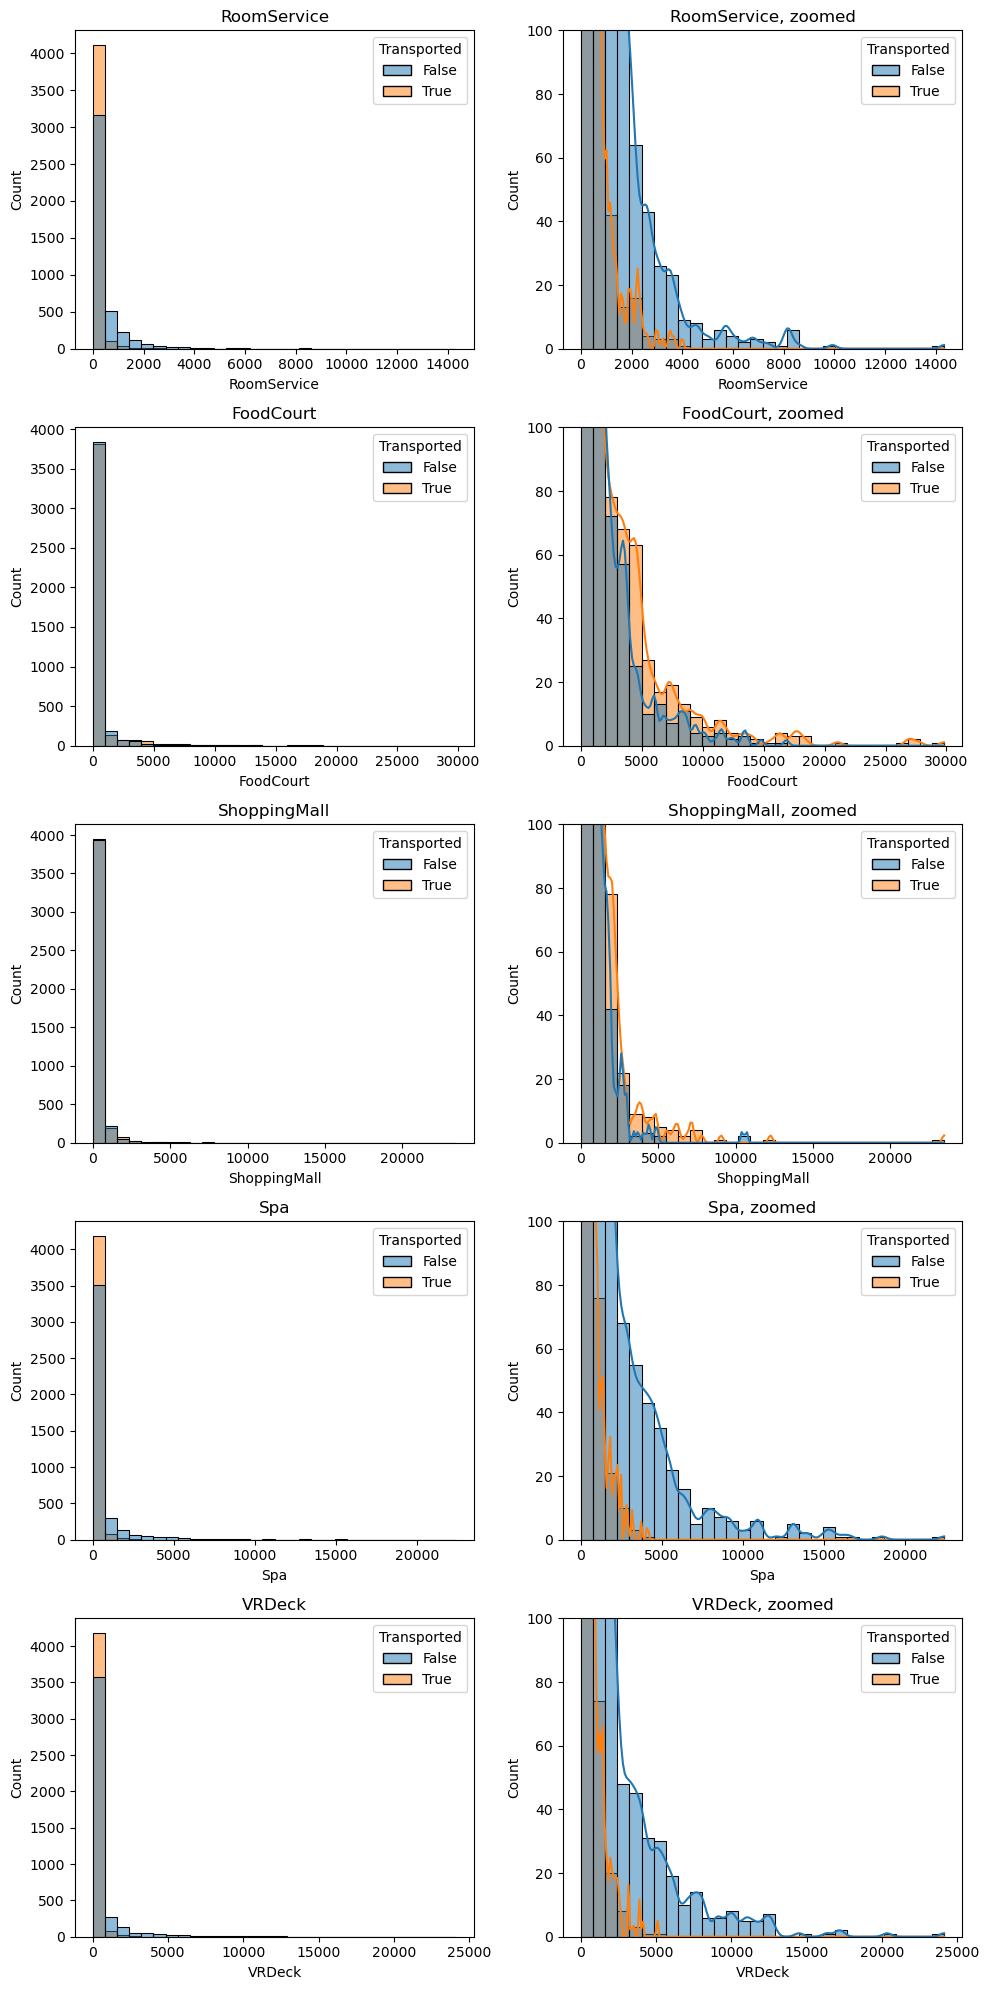

In [9]:
# Expenditure features visualization

fig = plt.figure(figsize=(10, 20))
exp_feats = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for i, feature in enumerate(exp_feats):
    # Left plot (full-view)
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.histplot(data=train_df, x=feature, bins=30, hue="Transported", kde=False, axes=ax)
    ax.set_title(feature)

    # Right plot (zoomed, max 'y' of 100)
    ax = fig.add_subplot(5, 2, 2*i+2)
    sns.histplot(data=train_df, x=feature, bins=30, hue="Transported", kde=True, axes=ax)
    plt.ylim([0, 100])
    ax.set_title("{}, zoomed".format(feature))

fig.tight_layout()
plt.show()

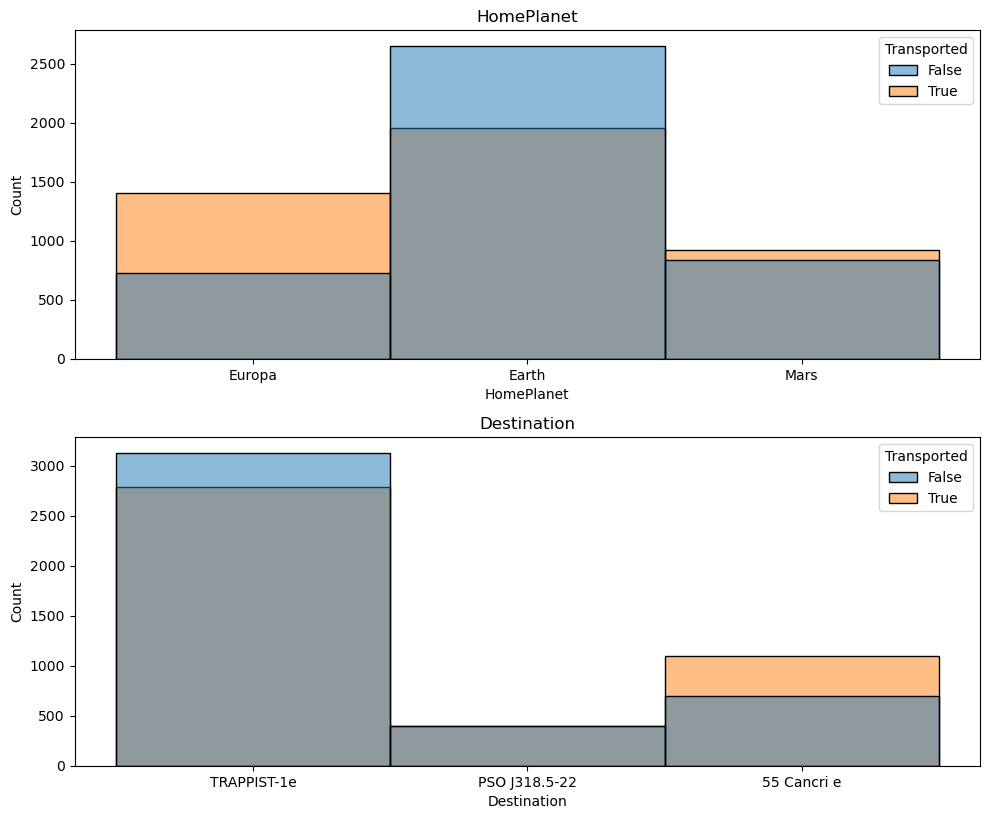

In [10]:
# Categorical features visualization (part 1: 'HomePlanet' and 'Destination')
cat_feats=['HomePlanet', 'Destination']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, feature in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.histplot(data=train_df, x=feature, axes=ax, hue='Transported')
    ax.set_title(feature)

fig.tight_layout()  
plt.show()

In [11]:
# Categorical features visualization (part 2: 'CryoSleep' and 'VIP')
cryo_transported = train_df.loc[(train_df['CryoSleep'] == True) & (train_df['Transported'] == True), 'Transported'].count()
cryo_stays = train_df.loc[(train_df['CryoSleep'] == True) & (train_df['Transported'] == False), 'Transported'].count()
vip_transported = train_df.loc[(train_df['VIP'] == True) & (train_df['Transported'] == True), 'Transported'].count()
vip_stays = train_df.loc[(train_df['VIP'] == True) & (train_df['Transported'] == False), 'Transported'].count()

print(cryo_transported, cryo_stays, vip_transported, vip_stays)

2483 554 76 123


Text(0.5, 1.0, 'CryoSleep and VIP Pax Distribution')

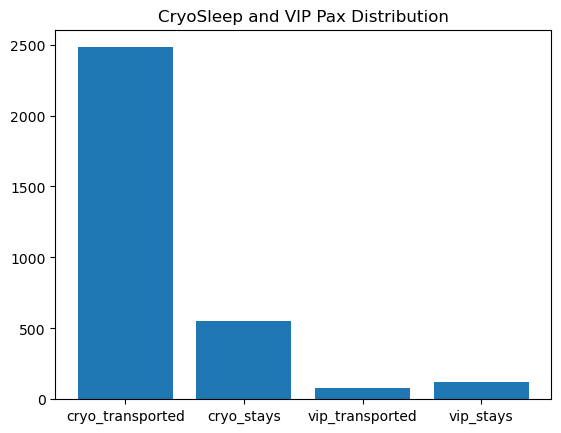

In [12]:
cat_feats_2_dict = {
    'categories' : ['cryo_transported', 'cryo_stays', 'vip_transported', 'vip_stays'],
    'counts' : [cryo_transported, cryo_stays, vip_transported, vip_stays]
}
plt.bar(
    data=cat_feats_2_dict,
    x='categories',
    height='counts')
plt.title("CryoSleep and VIP Pax Distribution")

Insights:
- Passenger who went into CryoSleep is most likely to be transported.
- Passenger who is a VIP is most likely not to be transported.

In [13]:
# Qualitative feats
qual_feats = ['PassengerId', 'Cabin', 'Name']
train_df[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


Qualitative insights:
- Extract deck, num, side from the cabin feature
- Extract group and group size from the PassengerId feature
- Extract surname from the Name feature to identify families

# Feature Engineering 
"Better features make better models."

### Age Status
- Age_0-18: most likely transported.
- Age_19-35: most likely not transported.
- Age_36-50: equally likely.
- Age_51+: equally likely.

In [14]:
train_df['AgeGroup'] = np.nan
train_df.loc[train_df['Age'] <= 18, 'AgeGroup'] = 'Age_0-18'
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 35), 'AgeGroup'] = 'Age_19-35'
train_df.loc[(train_df['Age'] > 35) & (train_df['Age'] <=50), 'AgeGroup'] = 'Age_36-50' 
train_df.loc[train_df['Age'] > 50, 'AgeGroup'] = 'Age_51+'

In [15]:
# Do binning for test 
test_df['AgeGroup'] = np.nan
test_df.loc[test_df['Age'] <= 18, 'AgeGroup'] = 'Age_0-18'
test_df.loc[(test_df['Age'] > 18) & (test_df['Age'] <= 35), 'AgeGroup'] = 'Age_19-35'
test_df.loc[(test_df['Age'] > 35) & (test_df['Age'] <=50), 'AgeGroup'] = 'Age_36-50' 
test_df.loc[test_df['Age'] > 50, 'AgeGroup'] = 'Age_51+'

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Spaceship Titanic Pax Age Group')

<Figure size 1000x400 with 0 Axes>

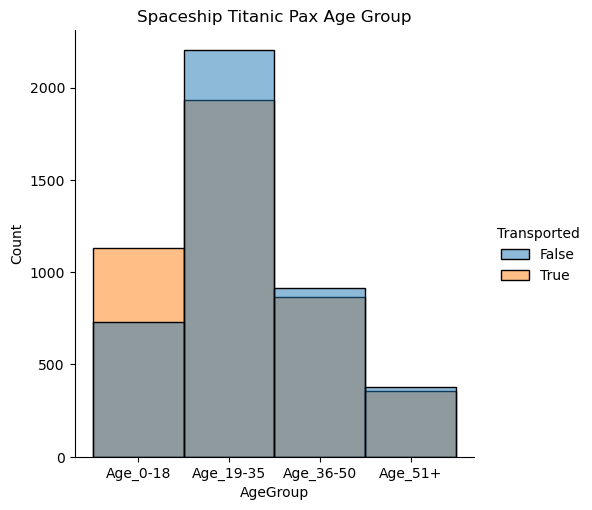

In [16]:
# Age group visualization
plt.figure(figsize=(10, 4))
sns.displot(
    data=train_df.sort_values(by='AgeGroup'),
    x='AgeGroup',
    hue='Transported'
)
plt.title('Spaceship Titanic Pax Age Group')

### Expenditure
- Calculate total expenditure, and
- Identify paxes with 0 expense

In [17]:
train_df['Expenditure'] = train_df[exp_feats].sum(axis=1)
train_df['NoSpending'] = (train_df['Expenditure']==0).astype(int)

In [18]:
test_df['Expenditure'] = test_df[exp_feats].sum(axis=1)
test_df['NoSpending'] = (test_df['Expenditure']==0).astype(int)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

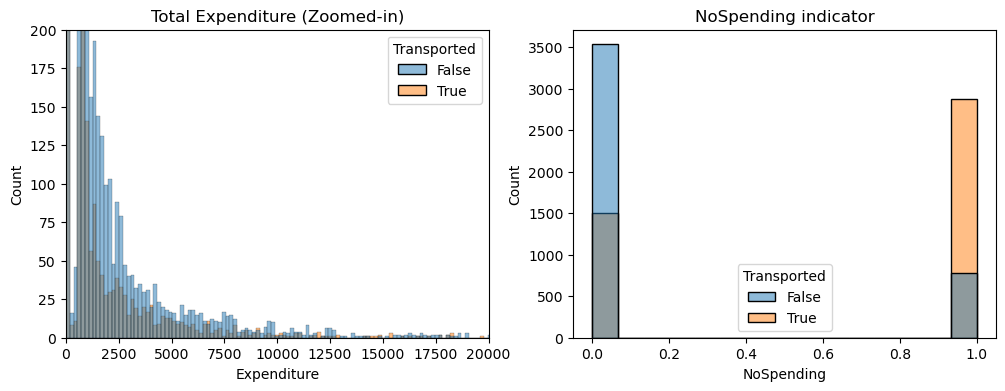

In [19]:
# Expenditure and NoSpending visualization
fig = plt.figure(figsize=(12, 4))

# Plot expenditure (zoomed-in)
plt.subplot(1, 2, 1)
sns.histplot(data=train_df,
            x='Expenditure',
            hue='Transported',
            bins=200)
plt.title("Total Expenditure (Zoomed-in)")
plt.ylim([0, 200])
plt.xlim([0, 20000])

# Plot NoSpending 
plt.subplot(1, 2, 2)
sns.histplot(
    data=train_df,
    x='NoSpending',
    hue='Transported'
)
plt.title("NoSpending indicator")

plt.tight_layout

Insights:
- Passengers, please spend your money.
- The more you spend, the better.

### Passenger Group
Extracting passenger group and group size based on PassengerId
- 'gggg' indicates the group
- '_' is used as delim.

In [20]:
# Extracting Group from PassengerId using lambda function
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [21]:
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [22]:
# Count each group frequency, store it in a dict
group_sizes = pd.concat([train_df, test_df])['Group'].value_counts().to_dict()

In [23]:
# Fill each record with its respective group_sizes
train_df['GroupSize'] = train_df['Group'].apply(lambda x : group_sizes.get(x, 0))
test_df['GroupSize'] = test_df['Group'].apply(lambda x: group_sizes.get(x, 0))

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'GroupSize distribution')

<Figure size 1000x400 with 0 Axes>

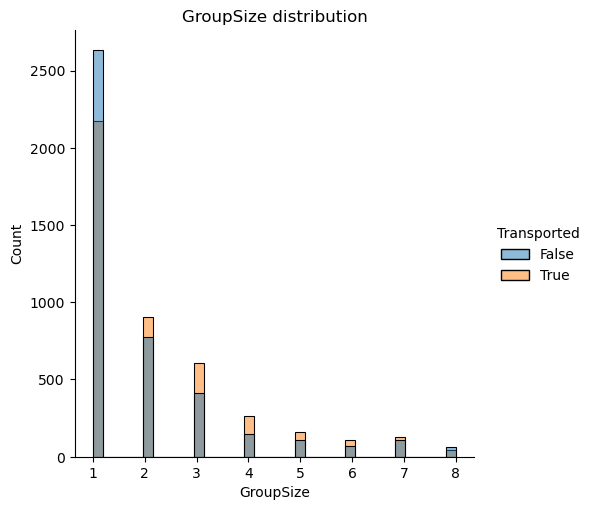

In [24]:
plt.figure(figsize=(10,4))
sns.displot(
    data=train_df,
    x='GroupSize',
    hue='Transported'
)
plt.title("GroupSize distribution")

Insights:
- Group with size one is less likely to be transported.
- Data can be compressed further: 'Solo' feature.

<Axes: title={'center': 'Solo passenger distribution'}, xlabel='Solo', ylabel='Count'>

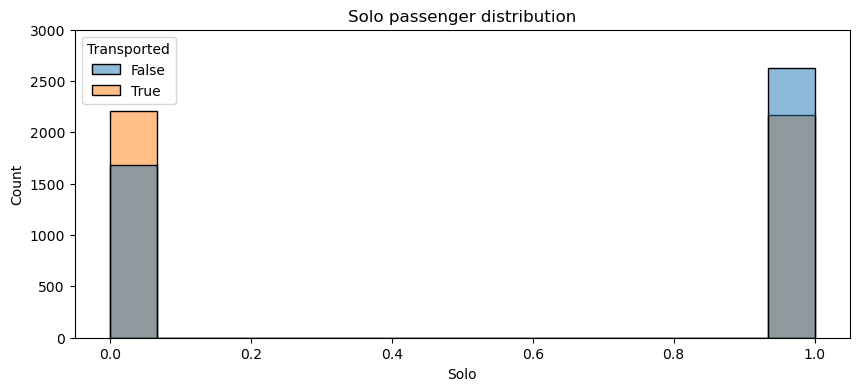

In [25]:
train_df['Solo'] = (train_df['GroupSize']==1).astype(int)
test_df['Solo'] = (test_df['GroupSize']==1).astype(int)

# Solo visualization
plt.figure(figsize=(10,4))
plt.title("Solo passenger distribution")
plt.ylim([0, 3000])
sns.histplot(
    data=train_df,
    x='Solo',
    hue='Transported'
)

### Cabin location

Format: deck/num/side
- Extract deck
- Extract num
- Extract side

Cabin number is unique regardless of its deck, e.g. there's no such case where F/10 and G/10 are present at the same time.

In [26]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,Expenditure,NoSpending,Group,GroupSize,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_36-50,0.0,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_19-35,736.0,0,2,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_51+,10383.0,0,3,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Age_19-35,5176.0,0,3,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Age_0-18,1091.0,0,4,1,1


In [27]:
# Fill NaN with outliers for feature extraction purpose.
train_df['Cabin'].fillna('Z/9999/Z', inplace=True)
test_df['Cabin'].fillna('Z/9999/Z', inplace=True)

# Split cabin, delimiter of '/'
train_df['CabinDeck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0])
train_df['CabinNum'] = train_df['Cabin'].apply(lambda x: x.split('/')[1])
train_df['CabinSide'] = train_df['Cabin'].apply(lambda x: x.split('/')[2])

test_df['CabinDeck'] = test_df['Cabin'].apply(lambda x: x.split('/')[0])
test_df['CabinNum'] = test_df['Cabin'].apply(lambda x: x.split('/')[1])
test_df['CabinSide'] = test_df['Cabin'].apply(lambda x: x.split('/')[2])

# Put NaN back
train_df.loc[train_df['CabinDeck']=='Z', 'CabinDeck'] = np.nan
train_df.loc[train_df['CabinNum']=='9999', 'CabinNum'] = np.nan
train_df.loc[train_df['CabinSide']=='Z', 'CabinSide'] = np.nan

test_df.loc[test_df['CabinDeck']=='Z', 'CabinDeck'] = np.nan
test_df.loc[test_df['CabinNum']=='9999', 'CabinNum'] = np.nan
test_df.loc[test_df['CabinSide']=='Z', 'CabinSide'] = np.nan

In [28]:
train_df['CabinNum'].fillna('9999', inplace=True)
train_df['CabinNum'] = train_df['CabinNum'].astype(int)
train_df.loc[train_df['CabinNum']==9999, 'CabinNum'] = np.nan

test_df['CabinNum'].fillna('9999', inplace=True)
test_df['CabinNum'] = test_df['CabinNum'].astype(int)
test_df.loc[test_df['CabinNum']==9999, 'CabinNum'] = np.nan

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,AgeGroup,Expenditure,NoSpending,Group,GroupSize,Solo,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,Age_36-50,0.0,1,1,1,1,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,Age_19-35,736.0,0,2,1,1,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,Age_51+,10383.0,0,3,2,0,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,Age_19-35,5176.0,0,3,2,0,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,Age_0-18,1091.0,0,4,1,1,F,1.0,S


In [29]:
# Checks for how many unique values of CabinDeck are there
train_df['CabinDeck'].value_counts()
test_df['CabinDeck'].value_counts()

CabinDeck
F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: count, dtype: int64

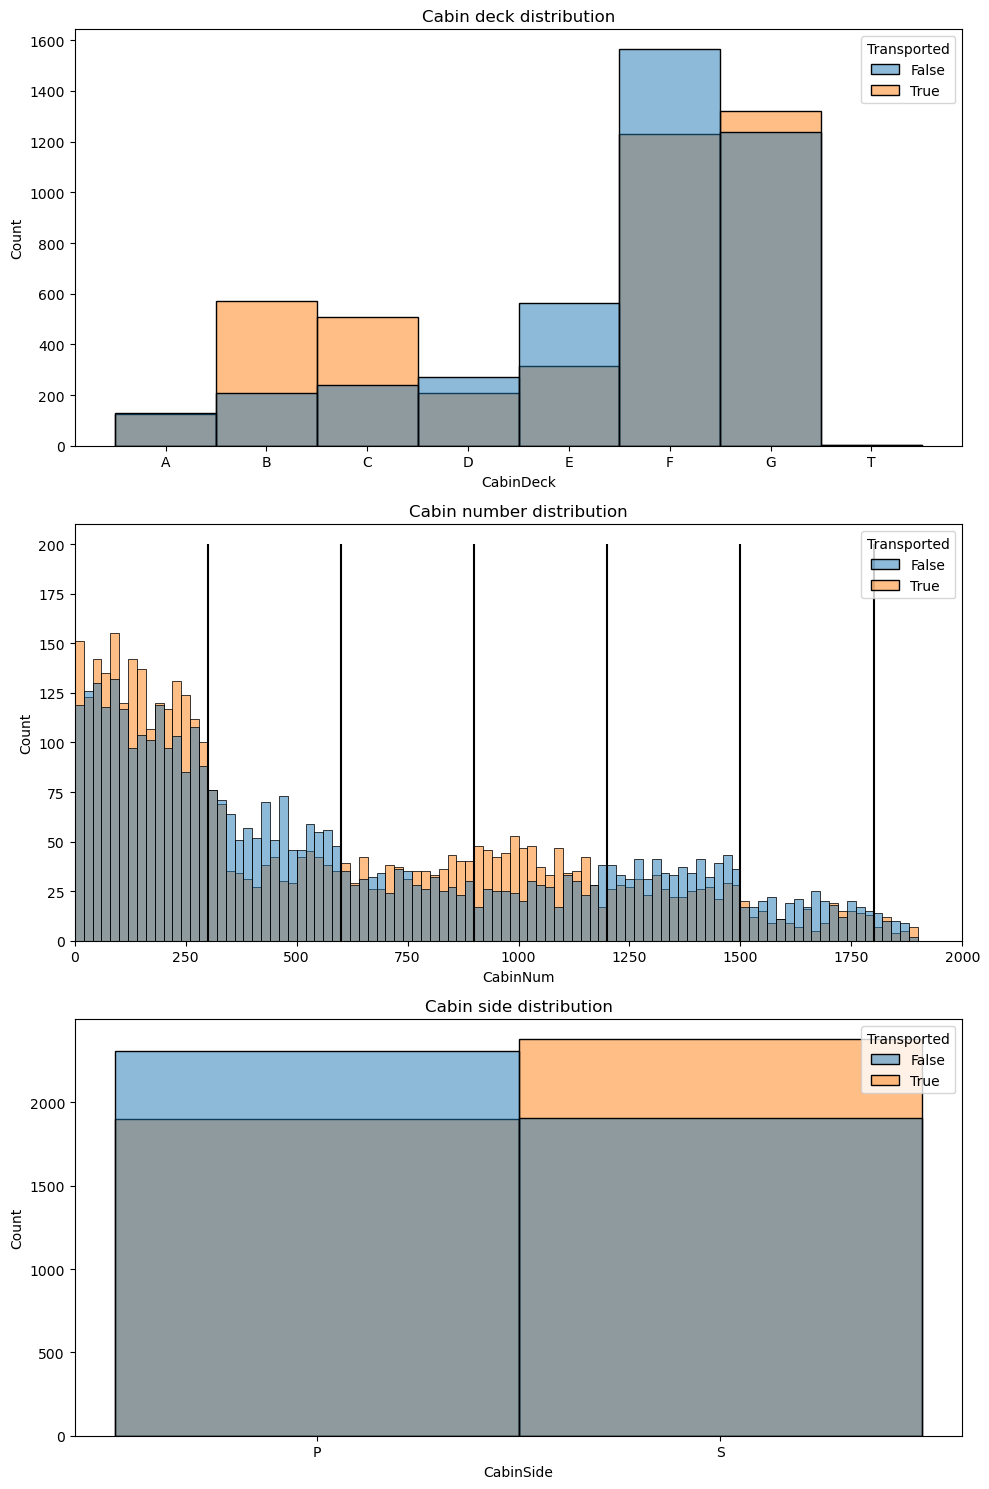

In [30]:
# Plot CabinDeck distribution
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
sns.histplot(data=train_df.sort_values(by='CabinDeck'),
             x='CabinDeck',
             hue='Transported')
plt.title("Cabin deck distribution")

# Plot CabinNum distribution
plt.subplot(3, 1, 2)
sns.histplot(data=train_df,
             x='CabinNum',
             hue='Transported',
             binwidth=20)

# Ffs I haven't figured the real reason as to why they did the grouping of CabinNum every 300
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.xlim([0, 2000])
plt.title("Cabin number distribution")

# Plot CabinSide distribution
plt.subplot(3, 1, 3)
sns.histplot(data=train_df.sort_values(by='CabinSide'),
             x='CabinSide',
             hue='Transported')
plt.title("Cabin side distribution")

plt.tight_layout()


### Feature Discritization: CabinRegion

From the above fig:
- Paxes in CabinDeck B, C, G are most likely to be transported.
- Paxes in CabinDeck D, E, F are most likely not to be transported.
- Paxes in CabinDeck A are equally likely to be transported than not.
- CabinNum are being grouped into chunks of size 300. This can be used to create a discritization, forming a new feature called CabinRegion.
- Another option is to do a one-hot encoding by creating 7 new features (CabinRegion_1 - CabinRegion_7).

In [31]:
# One-Hot encoding
train_df['CabinRegion_1'] = (train_df['CabinNum'] < 300).astype(int)
train_df['CabinRegion_2'] = ((train_df['CabinNum'] >= 300) & (train_df['CabinNum'] < 600)).astype(int)
train_df['CabinRegion_3'] = ((train_df['CabinNum'] >= 600) & (train_df['CabinNum'] < 900)).astype(int)
train_df['CabinRegion_4'] = ((train_df['CabinNum'] >= 900) & (train_df['CabinNum'] < 1200)).astype(int)
train_df['CabinRegion_5'] = ((train_df['CabinNum'] >= 1200) & (train_df['CabinNum'] < 1500)).astype(int)
train_df['CabinRegion_6'] = ((train_df['CabinNum'] >= 1500) & (train_df['CabinNum'] < 1800)).astype(int)
train_df['CabinRegion_7'] = (train_df['CabinNum'] >= 1800).astype(int)

test_df['CabinRegion_1'] = (test_df['CabinNum'] < 300).astype(int)
test_df['CabinRegion_2'] = ((test_df['CabinNum'] >= 300) & (test_df['CabinNum'] < 600)).astype(int)
test_df['CabinRegion_3'] = ((test_df['CabinNum'] >= 600) & (test_df['CabinNum'] < 900)).astype(int)
test_df['CabinRegion_4'] = ((test_df['CabinNum'] >= 900) & (test_df['CabinNum'] < 1200)).astype(int)
test_df['CabinRegion_5'] = ((test_df['CabinNum'] >= 1200) & (test_df['CabinNum'] < 1500)).astype(int)
test_df['CabinRegion_6'] = ((test_df['CabinNum'] >= 1500) & (test_df['CabinNum'] < 1800)).astype(int)
test_df['CabinRegion_7'] = (test_df['CabinNum'] >= 1800).astype(int)

# Label encoding
train_df['CabinRegion'] = np.nan
train_df.loc[train_df['CabinRegion_1']==1, 'CabinRegion'] = 1
train_df.loc[train_df['CabinRegion_2']==1, 'CabinRegion'] = 2
train_df.loc[train_df['CabinRegion_3']==1, 'CabinRegion'] = 3
train_df.loc[train_df['CabinRegion_4']==1, 'CabinRegion'] = 4
train_df.loc[train_df['CabinRegion_5']==1, 'CabinRegion'] = 5
train_df.loc[train_df['CabinRegion_6']==1, 'CabinRegion'] = 6
train_df.loc[train_df['CabinRegion_7']==1, 'CabinRegion'] = 7

test_df['CabinRegion'] = np.nan
test_df.loc[test_df['CabinRegion_1']==1, 'CabinRegion'] = 1
test_df.loc[test_df['CabinRegion_2']==1, 'CabinRegion'] = 2
test_df.loc[test_df['CabinRegion_3']==1, 'CabinRegion'] = 3
test_df.loc[test_df['CabinRegion_4']==1, 'CabinRegion'] = 4
test_df.loc[test_df['CabinRegion_5']==1, 'CabinRegion'] = 5
test_df.loc[test_df['CabinRegion_6']==1, 'CabinRegion'] = 6
test_df.loc[test_df['CabinRegion_7']==1, 'CabinRegion'] = 7

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinNum,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,P,1,0,0,0,0,0,0,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.0,S,1,0,0,0,0,0,0,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,S,1,0,0,0,0,0,0,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,S,1,0,0,0,0,0,0,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1.0,S,1,0,0,0,0,0,0,1.0


Text(0.5, 1.0, 'Cabin region distribution')

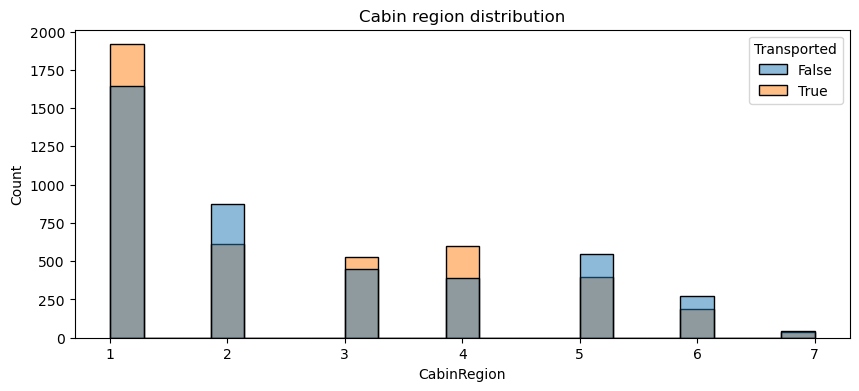

In [32]:
# CabinRegion visualization
plt.figure(figsize=(10, 4))
sns.histplot(
    data=train_df.sort_values(by='CabinRegion'),
    x='CabinRegion',
    hue='Transported'
)
plt.title('Cabin region distribution')

## Family size calculation

Extracted from feature 'Name', use delimiter ' '.
- Create new feature 'Surname'
- Create new feature 'FamilySize'

In [33]:
train_df['Name'].fillna('Unknown Unknown', inplace=True)
test_df['Name'].fillna('Unknown Unknown', inplace=True)

# Surname extraction
train_df['Surname'] = train_df['Name'].apply(lambda x: x.split(' ')[-1])
test_df['Surname'] = test_df['Name'].apply(lambda x: x.split(' ')[-1])

In [34]:
# Count surname, store it in a dictionary
surname_dict = pd.concat([train_df, test_df])['Surname'].value_counts().to_dict()

# Extract and fill w respective family size
train_df['FamilySize'] = train_df['Surname'].apply(lambda x: surname_dict.get(x))
test_df['FamilySize'] = test_df['Surname'].apply(lambda x: surname_dict.get(x))

# Put NaN back
train_df.loc[train_df['Surname']=='Unknown', 'FamilySize'] = np.nan
train_df.loc[train_df['Surname']=='Unknown', 'Surname'] = np.nan

test_df.loc[test_df['Surname']=='Unknown', 'FamilySize'] = np.nan
test_df.loc[test_df['Surname']=='Unknown', 'Surname'] = np.nan

# Drop Name cs we don't need it
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,Surname,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1.0,Ofracculy,3.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,0,0,0,0,0,0,1.0,Vines,4.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1,0,0,0,0,0,0,1.0,Susent,7.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,1,0,0,0,0,0,0,1.0,Susent,7.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,0,0,0,0,0,0,1.0,Santantines,9.0


/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'FamilySize distribution')

<Figure size 1000x400 with 0 Axes>

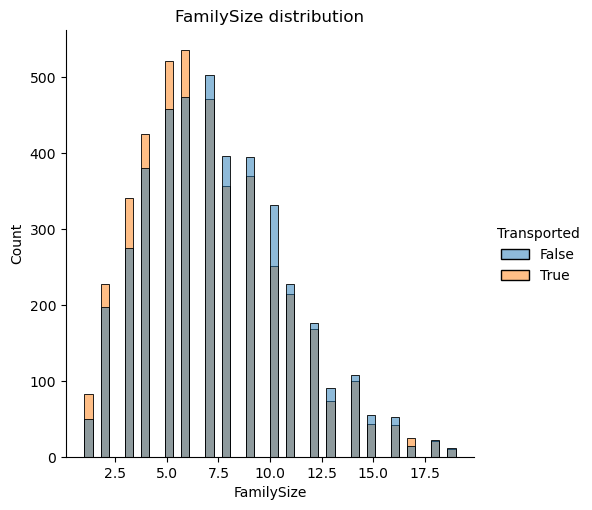

In [35]:
# FamilySize visualization
plt.figure(figsize=(10, 4))
sns.displot(
    data=train_df.sort_values(by='FamilySize'),
    x='FamilySize',
    hue='Transported'
)
plt.title('FamilySize distribution')

# Missing Values

## Combine Train and Test

In [36]:
train_y = train_df['Transported'].copy().astype(int)
train_X = train_df.drop('Transported', axis=1).copy()

df = pd.concat([train_X, test_df], axis=0).reset_index(drop=True)

In [37]:
# Columns with missing values
nan_feats = df.columns[df.isna().any()].tolist()

# Create summary
nan_feats_summary = pd.DataFrame(df[nan_feats].isna().sum(), columns=['NumberMissing'])
nan_feats_summary['PercentMissing'] = np.round(100 * nan_feats_summary['NumberMissing']/len(df), 2)
nan_feats_summary.sort_values(by='NumberMissing', ascending=False)

,NumberMissing,PercentMissing
CryoSleep,310,2.39
ShoppingMall,306,2.36
CabinDeck,299,2.31
CabinRegion,299,2.31
CabinSide,299,2.31
CabinNum,299,2.31
VIP,296,2.28
FamilySize,294,2.27
Surname,294,2.27
FoodCourt,289,2.23


Text(0.5, 1.0, 'Heatmap of missing values')

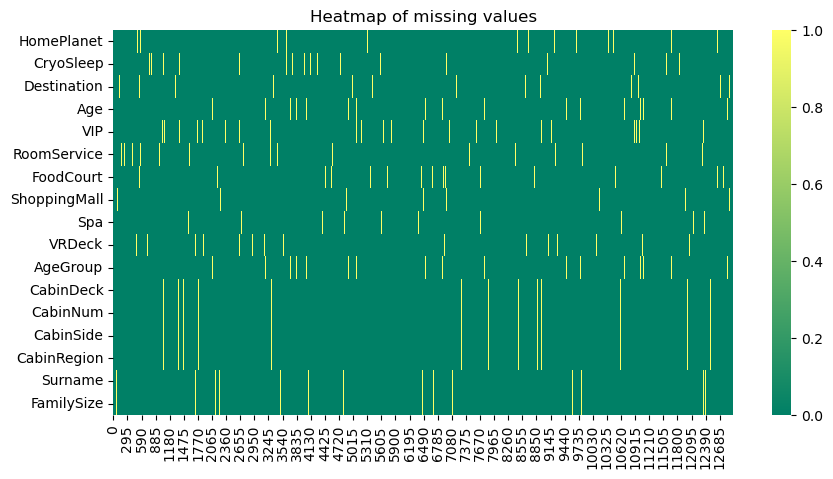

In [38]:
# Missing values heatmap to see feature isolation
plt.figure(figsize=(10, 5))
sns.heatmap(df[nan_feats].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Insight: 
- On average, NaN composes only 2% of the total records, but most of the NaN are isolated.
- Dropping rows with NaN causes a big loss.

Try to:
- Find correlation between HomePlanet with Group, Destination, Surname, Deck

## Treating HomePlanet Missing Values

HomePlanet treated by: Group, CabinDeck, Surname, Destination

### HomePlanet and Group

Takeaway: "Each group only have one HomePlanet."

In [39]:
# Joint distribution of Group and HomePlanet
GHP_gb = df.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


Insight: 
- Each Group belong only to one HomePlanet.
- Fill missing HomePlanet values with its respective group's HomePlanet

In [40]:
# Missing values before
HP_bef=df['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=df[df['HomePlanet'].isna()][(df[df['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
df.loc[GHP_index,'HomePlanet']=df.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


### HomePlanet and CabinDeck

- Deck A, B, C, T came from Europa

- Deck G came from Earth

<Axes: xlabel='CabinDeck', ylabel='HomePlanet'>

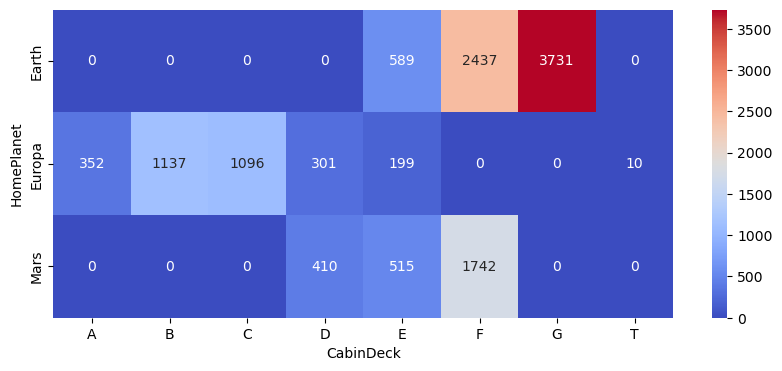

In [41]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb = df.groupby(['CabinDeck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10, 4))
sns.heatmap(
    data=CDHP_gb.T,
    fmt='g',
    cmap='coolwarm',
    annot=True
)

Notes:

- Passengers on decks A, B, C, T came from Europa

- Passengers on deck G came from Earth

- Passengers on decks D, E, F from multiple planets.  

In [42]:
# Missing values before CBHP treatment
HP_bef = df['HomePlanet'].isna().sum()

# CBHP Treatment: A, B, C, T -> Europa
df.loc[(df['HomePlanet'].isna()) & (df['CabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'

# CBHP Treatment: G -> Earth
df.loc[(df['HomePlanet'].isna()) & (df['CabinDeck'] == 'G'), 'HomePlanet'] = 'Earth'

# Missing values after CBHP treatment
print("HomePlanet missing values before: ", HP_bef)
print("HomePlanet missing values after: ", df['HomePlanet'].isna().sum())

HomePlanet missing values before:  157
HomePlanet missing values after:  94


### HomePlanet and Surname

Text(0.5, 1.0, 'Number of unique planets per Surname')

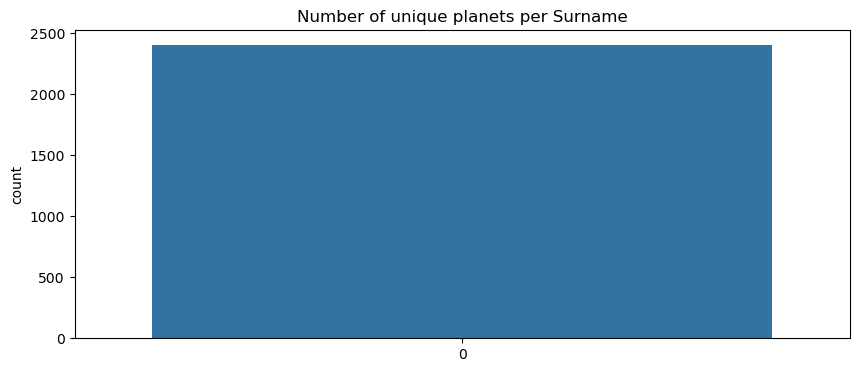

In [43]:
# Joint distribution of Surname and HomePlanet,
# to find how many unique HomePlanet value is in one Surname

SHP_gb = df.groupby(['Surname', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

plt.figure(figsize=(10, 4))
sns.countplot((SHP_gb > 0).sum(axis=1))
plt.title('Number of unique planets per Surname')

Insight: 1 Surname corresponds to 1 HomePlanet (either Earth, Europa, Mars)

In [44]:
# Missing values before Surname treatment
HP_bef = df['HomePlanet'].isna().sum()

# Pax index with missing HomePlanet values, with known Surname
SHP_index = df[df['HomePlanet'].isna()][(df[df['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding
df.loc[SHP_index, 'HomePlanet'] = df.iloc[SHP_index, :]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Missing values after Surname treatment
print("HomePlanet missing values before: ", HP_bef)
print("HomePlanet missing values after: ", df['HomePlanet'].isna().sum())

HomePlanet missing values before:  94
HomePlanet missing values after:  10


### HomePlanet and Destination

<Axes: xlabel='HomePlanet', ylabel='Destination'>

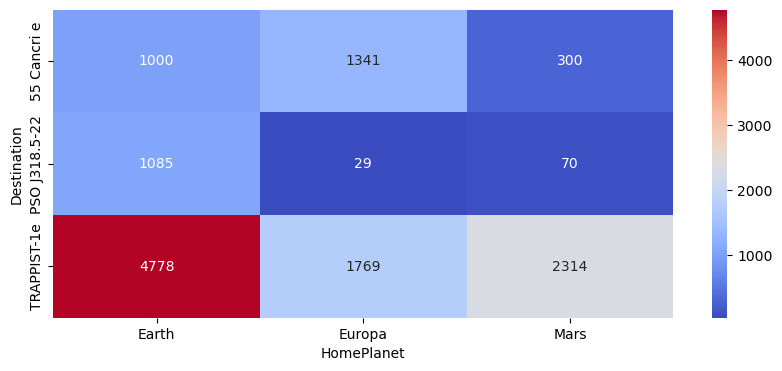

In [45]:
# Joint distribution of HomePlanet and Destination
HPD_gb=df.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')


Most people heading towards TRAPPIST-1e came from 

In [46]:
# Missing values before
HP_bef=df['HomePlanet'].isna().sum()

# print(HP_bef)

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
df.loc[(df['HomePlanet'].isna()) & ~(df['CabinDeck']=='D'), 'HomePlanet']='Earth'
df.loc[(df['HomePlanet'].isna()) & (df['CabinDeck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',df['HomePlanet'].isna().sum())



#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


## Destination Missing Values Treatment

In [47]:
D_bef = df['Destination'].isna().sum()
D_bef

274

Text(0.5, 1.0, 'Mars Destination Distribution')

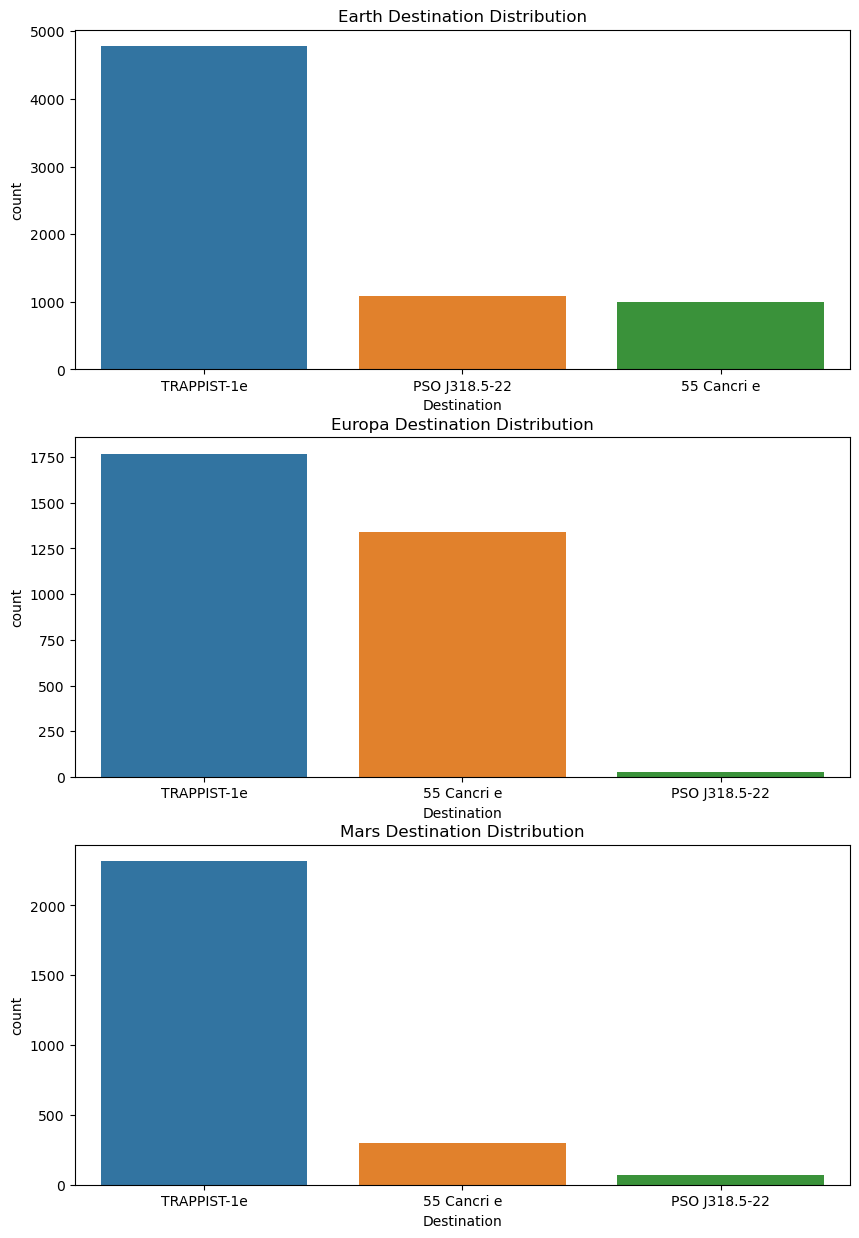

In [48]:
# Plot Destination based on HomePlanet

plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.countplot(
    data=df[df['HomePlanet']=='Earth'],
    x='Destination'
)
plt.title("Earth Destination Distribution")

plt.subplot(3, 1, 2)
sns.countplot(
    data=df[df['HomePlanet']=='Europa'],
    x='Destination'
)
plt.title("Europa Destination Distribution")

plt.subplot(3, 1, 3)
sns.countplot(
    data=df[df['HomePlanet']=='Mars'],
    x='Destination'
)
plt.title("Mars Destination Distribution")

In [49]:
# Plot Solo traveler with destination
plt.figure(figsize=(10, 5))
sns.displot(
    data=df[df['Solo']==1],
    x='Destination',
    hue='Transported'
)
plt.title("Solo traveler  destination distribution")

ValueError: Could not interpret value `Transported` for parameter `hue`

<Figure size 1000x500 with 0 Axes>

In [50]:
# Replace NaN destination with 'TRAPPIST-1e'
df.loc[df['Destination'].isna(), 'Destination'] = 'TRAPPIST-1e'

print("Destination missing values before: ", D_bef)
print("Destination missing values after: ", df['Destination'].isna().sum())

Destination missing values before:  274
Destination missing values after:  0


## Surname Missing Values Treatment

### Surname and Group

Text(0.5, 1.0, 'Number of unique surnames in a group')

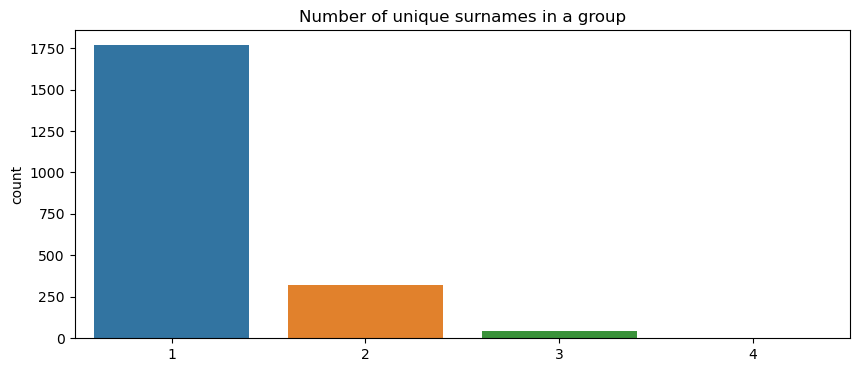

In [51]:
# Surname and Group joint distribution
GS_gb = df[df['GroupSize']>1].groupby(['Group', 'Surname'])['Surname'].size().unstack().fillna(0)
num_surnames = GS_gb.gt(0).sum(axis=1)

# Plot unique values of Surname for each group
plt.figure(figsize=(10, 4))
sns.countplot(x=num_surnames)
plt.title('Number of unique surnames in a group')

In [52]:
# Fill missing Surnames with majority Surname in its respective group

SN_bef = df['Surname'].isna().sum()

# Find rows with missing Surname
GS_index = df[df['Surname'].isna()][(df[df['Surname'].isna()]['Group']).isin(GS_gb.index)].index

# Fill with majority
df.loc[GS_index, 'Surname'] = df.iloc[GS_index, :]['Group'].map(lambda x: GS_gb.idxmax(axis=1)[x])

print('Surname missing values before: ', SN_bef)
print('Surname missing values after: ', df['Surname'].isna().sum())

Surname missing values before:  294
Surname missing values after:  155


In [53]:
# Update family size as some family size might have changed

# Fill NaNs with outlier so it can be mapped
df['Surname'].fillna('Unknown', inplace=True)

# Update family size
df['FamilySize'] = df['Surname'].map(lambda x: df['Surname'].value_counts()[x])

# Set Unknown's family size to 0, place back NaN
df.loc[df['Surname']=='Unknown', 'FamilySize'] = 0
df.loc[df['Surname']=='Unknown', 'Surname'] = np.nan

## CabinSide Missing Values Treatment

CabinSide NaNs will be filled based on the value of Group and Surname.

### CabinSide and Group

Text(0.5, 1.0, 'Unique CabinSide per Group')

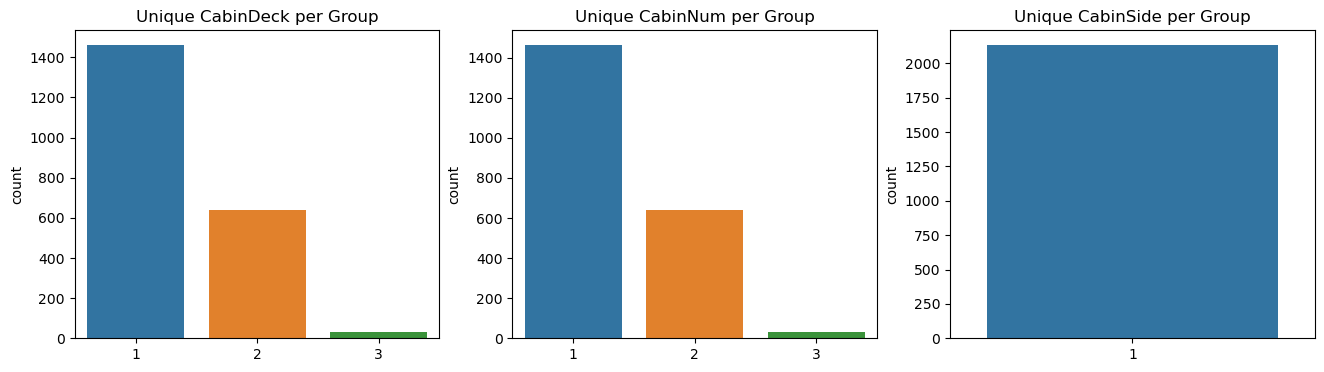

In [54]:
# Joint distribution of Group and Cabin feats
CDG_gb = df[df['GroupSize']>1].groupby(['Group', 'CabinDeck'])['CabinDeck'].size().unstack().fillna(0)
CNG_gb = df[df['GroupSize']>1].groupby(['Group', 'CabinNum'])['CabinNum'].size().unstack().fillna(0)
CSG_gb = df[df['GroupSize']>1].groupby(['Group', 'CabinSide'])['CabinSide'].size().unstack().fillna(0)

num_CDG = CDG_gb.gt(0).sum(axis=1)
num_CNG = CNG_gb.gt(0).sum(axis=1)
num_CSG = CSG_gb.gt(0).sum(axis=1)

# Countplots
fig=plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.countplot(
    x = num_CDG
)
plt.title("Unique CabinDeck per Group")
plt.subplot(1, 3, 2)
sns.countplot(
    x = num_CNG
)
plt.title("Unique CabinNum per Group")
plt.subplot(1, 3, 3)
sns.countplot(
    x = num_CSG
)
plt.title("Unique CabinSide per Group")


Insight:
- One CabinSide shares the same group.

In [55]:
# Missing values before
CS_bef=df['CabinSide'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
CSG_index=df[df['CabinSide'].isna()][(df[df['CabinSide'].isna()]['Group']).isin(CSG_gb.index)].index

# Fill corresponding missing values
df.loc[CSG_index,'CabinSide']=df.iloc[CSG_index,:]['Group'].map(lambda x: CSG_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#CabinSide missing values before:',CS_bef)
print('#CabinSide missing values after:',df['CabinSide'].isna().sum())

#CabinSide missing values before: 299
#CabinSide missing values after: 162


### CabinSide and Surname

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Ratio of CabinSide by Surname')

<Figure size 1000x400 with 0 Axes>

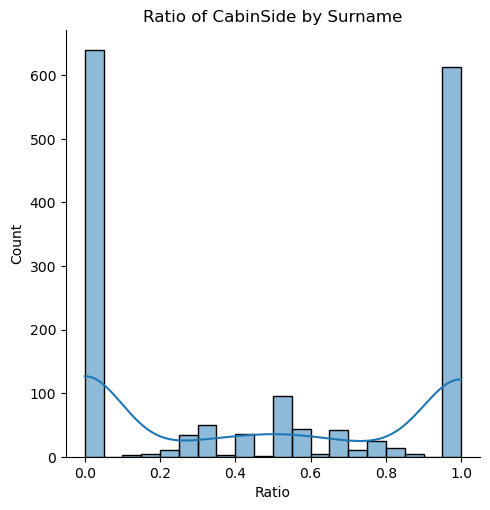

In [56]:
# Joint distribution of Surname and CabinSide
CSS_gb = df[df['GroupSize']>1].groupby(['Surname', 'CabinSide'])['CabinSide'].size().unstack().fillna(0)

# Ratio of sides
CSS_gb['Ratio'] = CSS_gb['P']/(CSS_gb['P'] + CSS_gb['S'])

# Histogram of Ratio
plt.figure(figsize=(10, 4))
sns.displot(data=CSS_gb['Ratio'], kde=True, binwidth=.05)
plt.title('Ratio of CabinSide by Surname')

In [57]:
# Percentage of all member of families are in the same CabinSide
print('Percentage of families all on the same CabinSide: ', 
      100*np.round((CSS_gb['Ratio'].isin([0, 1])).sum()/len(CSS_gb), 3), '%')

CSS_gb.head()

Percentage of families all on the same CabinSide:  76.7 %


CabinSide,P,S,Ratio
Surname,,,
Acobson,0.0,3.0,0.0
Acobsond,3.0,0.0,1.0
Adavisons,6.0,0.0,1.0
Admingried,0.0,4.0,0.0
Aginge,3.0,0.0,1.0


In [58]:
CS_bef = df['CabinSide'].isna().sum()
CSS_gb.drop('Ratio', axis=1, inplace=True)

# Locate
CSS_index = df[df['CabinSide'].isna()][(df[df['CabinSide'].isna()]['Surname']).isin(CSS_gb.index)].index

# Fill NaNs
df.loc[CSS_index, 'CabinSide'] = df.iloc[CSS_index, :]['Surname'].map(lambda x: CSS_gb.idxmax(axis=1)[x])

# Drop Surname
df.drop('Surname', axis=1, inplace=True)

print('CabinSide missing values before: ', CS_bef)
print('CabinSide missing values after: ', df['CabinSide'].isna().sum())

CabinSide missing values before:  162
CabinSide missing values after:  66


In [59]:
# Check P and S value_counts
df['CabinSide'].value_counts()

CabinSide
S    6504
P    6400
Name: count, dtype: int64

In [60]:
# Fill remaining missing values with Z

CS_bef = df['CabinSide'].isna().sum()
df.loc[df['CabinSide'].isna(), 'CabinSide'] = 'Z'

print('CabinSide missing values before: ', CS_bef)
print('CabinSide missing values after: ', df['CabinSide'].isna().sum())

CabinSide missing values before:  66
CabinSide missing values after:  0


## CabinDeck Missing Values Treatment

### CabinDeck and Group
Group tend to be on the same CabinDeck (see 'CabinSide and Group')

In [61]:
# Missing values of CD
CD_bef = df['CabinDeck'].isna().sum()

GCD_index = df[df['CabinDeck'].isna()][(df[df['CabinDeck'].isna()]['Group']).isin(CDG_gb.index)].index
df.loc[GCD_index, 'CabinDeck'] = df.iloc[GCD_index, :]['Group'].map(lambda x: CDG_gb.idxmax(axis=1)[x])

print('CabinDeck missing values before: ', CD_bef)
print('CabinDeck missing values after: ', df['CabinDeck'].isna().sum())

CabinDeck missing values before:  299
CabinDeck missing values after:  162


### CabinDeck and HomePlanet

In [62]:
# Joint distribution of CabinDeck and HomePlanet

df.groupby(['HomePlanet', 'Destination', 'Solo', 'CabinDeck'])['CabinDeck'].size().unstack().fillna(0)

CabinDeck                          A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

CabinDeck                           G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

Insight:
- No Earth paxes in CabinDeck A-D
- No Europa paxes in CabinDeck F-G
- No Mars paxes in CabinDeck A-C, G

- Earth paxes are mostly in CabinDeck G
- Europa paxes traveling solo are mostly in CabinDeck C
- Europa paxes traveling in group are mostly in CabinDeck B
- Mars paxes are mostly in CabinDeck F

In [63]:
# Missing values of CD before
CD_bef = df['CabinDeck'].isna().sum()

nan_rows_CD = df.loc[df['CabinDeck'].isna(), 'CabinDeck'].index
df.loc[df['CabinDeck'].isna(), 'CabinDeck'] = df.groupby(['HomePlanet', 'Destination', 'Solo'])['CabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[nan_rows_CD]

print('CabinDeck missing values before: ', CD_bef)
print('CabinDeck missing values after: ', df['CabinDeck'].isna().sum())

CabinDeck missing values before:  162
CabinDeck missing values after:  0


## CabinNum Missing Values Treatment

### CabinNum and CabinDeck

Text(0.5, 1.0, 'CabinNum and Group, colored by CabinDeck')

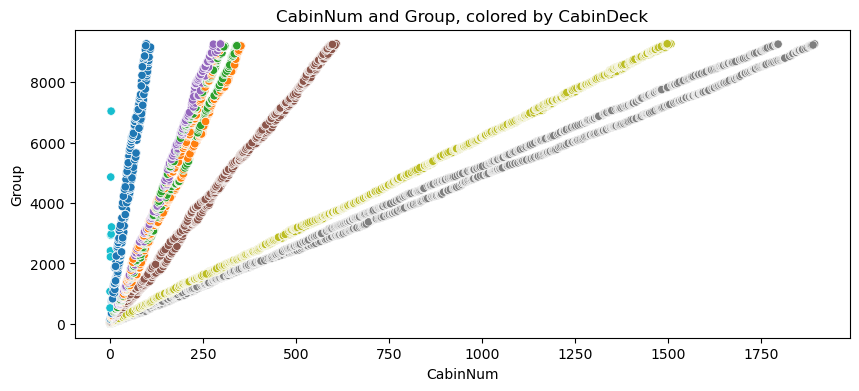

In [64]:
from sklearn.preprocessing import LabelEncoder

# Scatterplot
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, 
                x='CabinNum',
                y='Group',
                c=LabelEncoder().fit_transform(df.loc[~df['CabinNum'].isna(), 'CabinDeck']),
                cmap='tab10')
plt.title('CabinNum and Group, colored by CabinDeck')

Insight:
- CabinNum and Group shares a linear relationship on a deck-by-deck basis.
- CabinNum NaN values can be estimated using LinearRegression model per deck.

In [65]:
from sklearn.linear_model import LinearRegression
CN_bef = df['CabinNum'].isna().sum()

# Iterate for each deck yall
for CabinDeck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:

    # Extract X ('Group') and y ('CabinNum')
    X_train_CN = df.loc[~(df['CabinNum'].isna()) & (df['CabinDeck'] == CabinDeck), 'Group']
    y_train_CN = df.loc[~(df['CabinNum'].isna()) & (df['CabinDeck'] == CabinDeck), 'CabinNum']
    X_test_CN = df.loc[(df['CabinNum'].isna()) & (df['CabinDeck'] == CabinDeck), 'Group']

    X_train_CN = X_train_CN.to_numpy().reshape(-1, 1)
    X_test_CN = X_test_CN.to_numpy().reshape(-1, 1)

    # LinearRegression model
    model_CN = LinearRegression()
    model_CN.fit(X_train_CN, y_train_CN)

    pred_CN = model_CN.predict(X_test_CN)

    # Fill missing values
    df.loc[(df['CabinNum'].isna()) & (df['CabinDeck'] == CabinDeck), 'CabinNum'] = pred_CN.astype(int)

print('CabinNum missing values before: ', CN_bef)
print('CabinNum missing values after: ', df['CabinNum'].isna().sum())

CabinNum missing values before:  299
CabinNum missing values after:  0


### One-Hot and Label Encoding Update for CabinNum
Gotta update the encoding for CabinNum as the newly replaced NaN values aren't yet encoded.

In [66]:
# One-Hot encoding
df['CabinRegion_1'] = (df['CabinNum'] < 300).astype(int)
df['CabinRegion_2'] = ((df['CabinNum'] >= 300) & (df['CabinNum'] < 600)).astype(int)
df['CabinRegion_3'] = ((df['CabinNum'] >= 600) & (df['CabinNum'] < 900)).astype(int)
df['CabinRegion_4'] = ((df['CabinNum'] >= 900) & (df['CabinNum'] < 1200)).astype(int)
df['CabinRegion_5'] = ((df['CabinNum'] >= 1200) & (df['CabinNum'] < 1500)).astype(int)
df['CabinRegion_6'] = ((df['CabinNum'] >= 1500) & (df['CabinNum'] < 1800)).astype(int)
df['CabinRegion_7'] = (df['CabinNum'] >= 1800).astype(int)

# Label encoding
df['CabinRegion'] = np.nan
df.loc[df['CabinRegion_1']==1, 'CabinRegion'] = 1
df.loc[df['CabinRegion_2']==1, 'CabinRegion'] = 2
df.loc[df['CabinRegion_3']==1, 'CabinRegion'] = 3
df.loc[df['CabinRegion_4']==1, 'CabinRegion'] = 4
df.loc[df['CabinRegion_5']==1, 'CabinRegion'] = 5
df.loc[df['CabinRegion_6']==1, 'CabinRegion'] = 6
df.loc[df['CabinRegion_7']==1, 'CabinRegion'] = 7

## VIP Missing Values Treatment
VIP is heavily skewed whereas very few paxes are VIPs. Let's just fill with the mode (False).

In [67]:
df['VIP'].value_counts()

VIP
False    12401
True       273
Name: count, dtype: int64

In [68]:
V_bef = df['VIP'].isna().sum()
df.loc[df['VIP'].isna(), 'VIP'] = False

print('VIP missing values before: ', V_bef)
print('VIP missing values after: ', df['VIP'].isna().sum())

VIP missing values before:  296
VIP missing values after:  0


## Age Missing Values Treatment

Age varies across parameters like 'HomePlanet', 'NoSpending', 'Solo' and 'CabinDeck'. Age NaN values will be imputed using the median of each mentioned parameters (done using 'groupby()').

In [69]:
# Joint distribution

df.groupby(['HomePlanet', 'NoSpending', 'Solo', 'CabinDeck'])['Age'].median().unstack().fillna(0)

CabinDeck                      A     B     C     D     E     F     G     T
HomePlanet NoSpending Solo                                                
Earth      0          0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                      1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1          0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                      1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0          0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                      1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1          0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                      1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0          0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                      1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1          0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                      1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [70]:
A_bef = df[exp_feats].isna().sum().sum() # Honestly, idk why this one uses exp_feats

# Find and fill NaNs
nan_rows_A = df.loc[df['Age'].isna(), 'Age'].index
df.loc[df['Age'].isna(), 'Age'] = df.groupby(['HomePlanet', 'NoSpending', 'Solo', 'CabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[nan_rows_A]

print('Age missing values before: ', A_bef)
print('Age missing values after: ', df['Age'].isna().sum())

Age missing values before:  1410
Age missing values after:  0


### AgeGroup Update
Updating AgeGroup as some newly-added data to fill for the NaNs are yet to be assigned into AgeGroup. Refer to feature engineering chapter.

In [71]:
df.loc[df['Age'] <= 18, 'AgeGroup'] = 'Age_0-18'
df.loc[(df['Age'] > 18) & (df['Age'] <= 35), 'AgeGroup'] = 'Age_19-35'
df.loc[(df['Age'] > 35) & (df['Age'] <=50), 'AgeGroup'] = 'Age_36-50' 
df.loc[df['Age'] > 50, 'AgeGroup'] = 'Age_51+'

## CryoSleep
The best way to know if a passenger is in CryoSleep: NoSpending.

In [72]:
# Joint distribution
df.groupby(['NoSpending', 'CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep,False,True
NoSpending,,
0,7339.0,0.0
1,740.0,4581.0


In [73]:
CSL_bef = df['CryoSleep'].isna().sum()

# Locate NaN values
nan_rows_CSL = df.loc[df['CryoSleep'].isna(), 'CryoSleep'].index

# Fill NaNs with mode
df.loc[df['CryoSleep'].isna(), 'CryoSleep'] = df.groupby(['NoSpending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[nan_rows_CSL]

print('CryoSleep missing values before: ', CSL_bef)
print('CryoSleep missing values after: ', df['CryoSleep'].isna().sum())

CryoSleep missing values before:  310
CryoSleep missing values after:  0


## Expenditure Missing Values Treatment

### Expenditure (exp_feats) and CryoSleep
This makes a lot of sense as paxes who undergo CryoSleep spent less than those who don't.

In [74]:
print('Max expenditure of paxes in CryoSleep: ', df.loc[df['CryoSleep']==True, exp_feats].sum(axis=1).max())

Max expenditure of paxes in CryoSleep:  0.0


In [75]:
E_bef = df[exp_feats].isna().sum().sum()

for feature in exp_feats:
    df.loc[(df[feature].isna()) & (df['CryoSleep']==True), feature] = 0

print('Expenditure missing values before: ', E_bef)
print('Expenditure missing values after: ', df[exp_feats].isna().sum().sum())

Expenditure missing values before:  1410
Expenditure missing values after:  866


### Expenditure (exp_feats) and others
Expenditures varies across many features. What will be used here are: HomePlanet, Solo, and AgeGroup to prevent overfitting. Mean is going to be used instead of median as many paxes do not spend anything--heavily skewed. 

In [76]:
# Joint distribution
df.groupby(['HomePlanet', 'Solo', 'AgeGroup'])['Expenditure'].mean().unstack().fillna(0)

AgeGroup            Age_0-18    Age_19-35    Age_36-50      Age_51+
HomePlanet Solo                                                    
Earth      0      195.225275   804.045894   719.810458   733.649573
           1      635.090090   787.101179   806.611779   826.366972
Europa     0     1024.392453  3491.375833  3818.508993  3483.639004
           1     1887.958333  3445.845455  4124.675978  3952.085526
Mars       0      499.502513  1200.749180  1135.566265  1345.419643
           1     1319.083969  1078.027160  1127.200000  1100.298387

In [77]:
E_bef = df[exp_feats].isna().sum().sum()

# Fill with mean
for feature in exp_feats:
    nan_rows = df.loc[df[feature].isna(), feature].index
    df.loc[df[feature].isna(), feature] = df.groupby(['HomePlanet', 'Solo', 'AgeGroup'])[feature].transform(lambda x: x.fillna(x.mean()))[nan_rows]

print('Expenditure missing values before: ', E_bef)
print('Expenditure missing values after: ', df[exp_feats].isna().sum().sum())

Expenditure missing values before:  866
Expenditure missing values after:  0


In [78]:
# Update after filling 
df['Expenditure'] = df[exp_feats].sum(axis=1)
df['NoSpending'] = (df['Expenditure']==0).astype(int)

## Final Check

In [79]:
df.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
AgeGroup         0
Expenditure      0
NoSpending       0
Group            0
GroupSize        0
Solo             0
CabinDeck        0
CabinNum         0
CabinSide        0
CabinRegion_1    0
CabinRegion_2    0
CabinRegion_3    0
CabinRegion_4    0
CabinRegion_5    0
CabinRegion_6    0
CabinRegion_7    0
CabinRegion      0
FamilySize       0
dtype: int64

Text(0.5, 1.0, 'Heatmap of missing values after treatment')

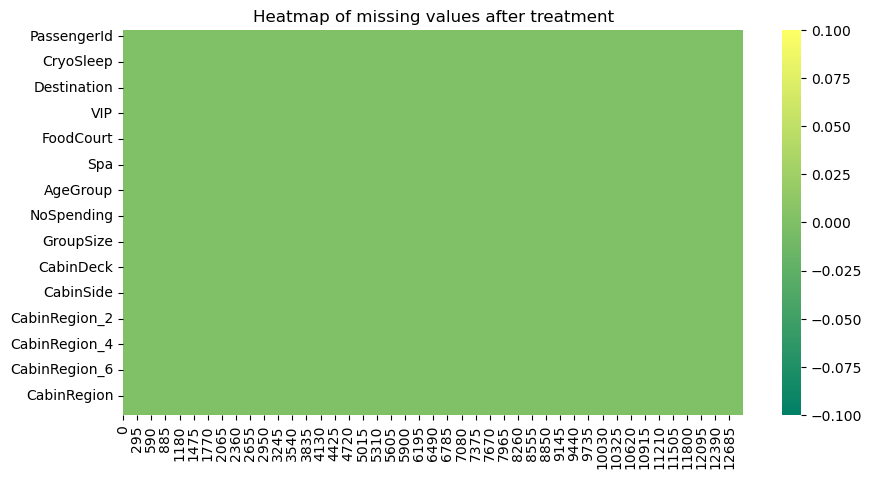

In [80]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna().T, cmap='summer')
plt.title('Heatmap of missing values after treatment')

In [81]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,P,1,0,0,0,0,0,0,1.0,4
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,S,1,0,0,0,0,0,0,1.0,4
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,S,1,0,0,0,0,0,0,1.0,7
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,S,1,0,0,0,0,0,0,1.0,7
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,S,1,0,0,0,0,0,0,1.0,9


# Export

In [82]:
train_y.to_csv('spaceship_train_y.csv')

In [83]:
train_X_clean = df[df['PassengerId'].isin(train_df['PassengerId'].values)].copy()
test_X_clean = df[df['PassengerId'].isin(test_df['PassengerId'].values)].copy()

In [84]:
train_X_clean.head()
test_X_clean.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinSide,CabinRegion_1,CabinRegion_2,CabinRegion_3,CabinRegion_4,CabinRegion_5,CabinRegion_6,CabinRegion_7,CabinRegion,FamilySize
8693,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,S,1,0,0,0,0,0,0,1.0,8
8694,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,S,1,0,0,0,0,0,0,1.0,4
8695,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,S,1,0,0,0,0,0,0,1.0,6
8696,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,S,1,0,0,0,0,0,0,1.0,2
8697,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,S,1,0,0,0,0,0,0,1.0,5
